패키지 준비

In [2]:
#기본적인 패키지부터 추가
import numpy as np
import pandas as pd
import scipy as sp

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# 차트 한글, 유니코드 마이너스 설정
from matplotlib import rc
import matplotlib.font_manager as fm

plt.rc('font', family='Malgun Gothic')
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False},style='darkgrid')

#머신러닝 패키지 추가
import statsmodels.api as sm    #안쓸걸
import sklearn as sk

#훈련 및 테스트세트 분리 패키지
from sklearn.model_selection import train_test_split

# 딥러닝 관련 패키지
from tensorflow import keras

#### 데이터 로드 및 훈련/검증 세트 분리

In [3]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0      #0~1사이 실수값으로 변경
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state= 42)

#### 모델 생성( 함수 이용 )

In [4]:
def model_fn(a_layer=None):
    model = keras.Sequential(name='model_fn_makemodel')
    model.add(keras.layers.Flatten(input_shape=(28,28)))    #2차원 입력값을 1차원으로
    model.add(keras.layers.Dense(100, activation='relu', name = 'hidden'))
    
    if a_layer:
        model.add(a_layer)      # a_layer를 매개변수로 케라스층을 추가하면 은닝층 뒤에 또 하나의 층을 추가하는 것
    model.add(keras.layers.Dense(10, activation='softmax', name = 'output'))
    
    return model

#### 손실곡선 및 정확도

In [5]:
model = model_fn(keras.layers.Dense(100, activation='relu', name = 'hidden2'))
model.summary()

Model: "model_fn_makemodel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 hidden2 (Dense)             (None, 100)               10100     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=5, verbose=2)

Epoch 1/5
1500/1500 - 3s - loss: 0.5211 - accuracy: 0.8119 - 3s/epoch - 2ms/step
Epoch 2/5
1500/1500 - 2s - loss: 0.3853 - accuracy: 0.8582 - 2s/epoch - 2ms/step
Epoch 3/5
1500/1500 - 2s - loss: 0.3565 - accuracy: 0.8723 - 2s/epoch - 2ms/step
Epoch 4/5
1500/1500 - 2s - loss: 0.3391 - accuracy: 0.8771 - 2s/epoch - 2ms/step
Epoch 5/5
1500/1500 - 3s - loss: 0.3301 - accuracy: 0.8826 - 3s/epoch - 2ms/step


In [7]:
print(history.history)
print(history.history.keys())


{'loss': [0.5211285948753357, 0.38533300161361694, 0.35649120807647705, 0.339142382144928, 0.33008065819740295], 'accuracy': [0.8118541836738586, 0.8582083582878113, 0.8722708225250244, 0.8770833611488342, 0.8826249837875366]}
dict_keys(['loss', 'accuracy'])


#### 손실곡선 차트

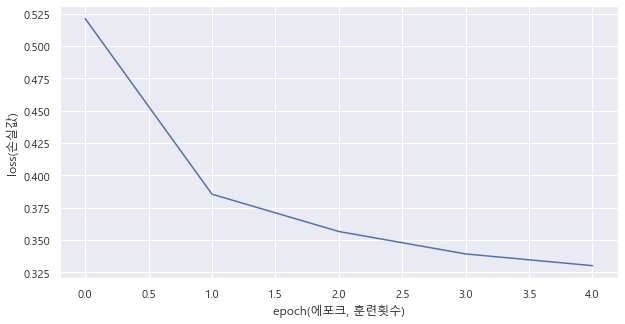

In [8]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.xlabel('epoch(에포크, 훈련횟수)')
plt.ylabel('loss(손실값)')
plt.show()

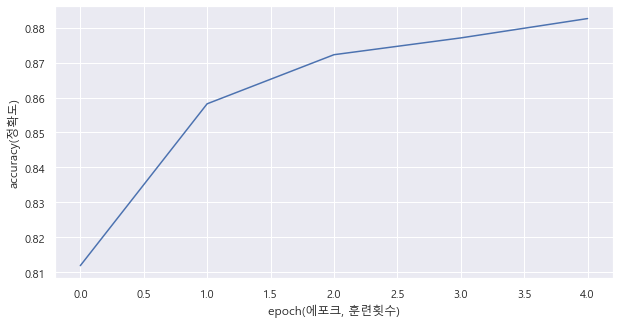

In [9]:
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'])
plt.xlabel('epoch(에포크, 훈련횟수)')
plt.ylabel('accuracy(정확도)')
plt.show()

#### 에포크 20번 훈련

In [10]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20)

Epoch 1/20
1444/1500 [===========================>..] - ETA: 0s - loss: 0.5378 - accuracy: 0.8108

KeyboardInterrupt: 

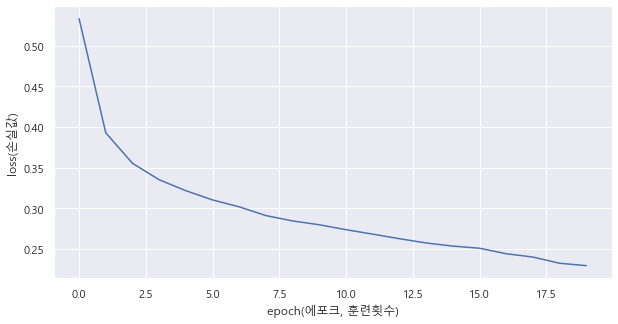

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.xlabel('epoch(에포크, 훈련횟수)')
plt.ylabel('loss(손실값)')
plt.show()

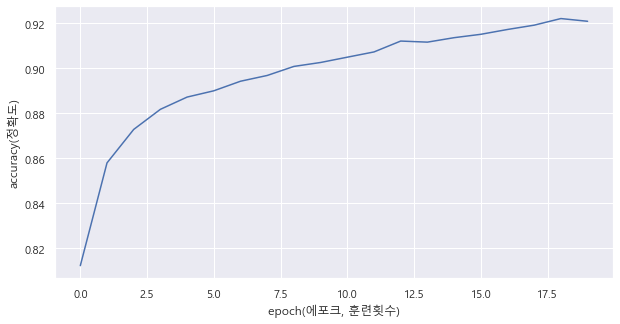

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'])
plt.xlabel('epoch(에포크, 훈련횟수)')
plt.ylabel('accuracy(정확도)')
plt.show()

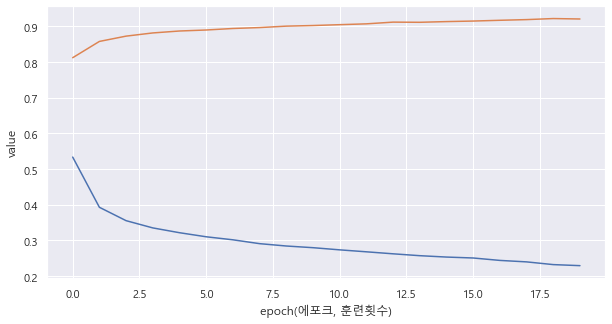

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.xlabel('epoch(에포크, 훈련횟수)')
plt.ylabel('value')
plt.show()

#### 검증 손실

훈련세트 훈련 -> 정확도 0.92

In [ ]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target))

Epoch 1/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5426 - accuracy: 0.8099 - val_loss: 0.4252 - val_accuracy: 0.8482
Epoch 2/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3966 - accuracy: 0.8571 - val_loss: 0.3718 - val_accuracy: 0.8698
Epoch 3/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3573 - accuracy: 0.8715 - val_loss: 0.4092 - val_accuracy: 0.8588
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3356 - accuracy: 0.8789 - val_loss: 0.4235 - val_accuracy: 0.8560
Epoch 5/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3175 - accuracy: 0.8855 - val_loss: 0.3896 - val_accuracy: 0.8703
Epoch 6/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3085 - accuracy: 0.8892 - val_loss: 0.3730 - val_accuracy: 0.8750
Epoch 7/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2980 - accuracy: 0.8943 - val_loss: 0.3644 - val_accuracy:

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

#### 훈련 및 검증세트 비교

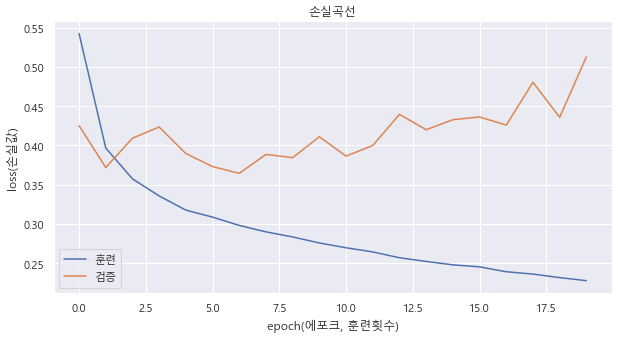

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.xlabel('epoch(에포크, 훈련횟수)')
plt.ylabel('loss(손실값)')
plt.legend(['훈련','검증'])
plt.title('손실곡선')
plt.show()

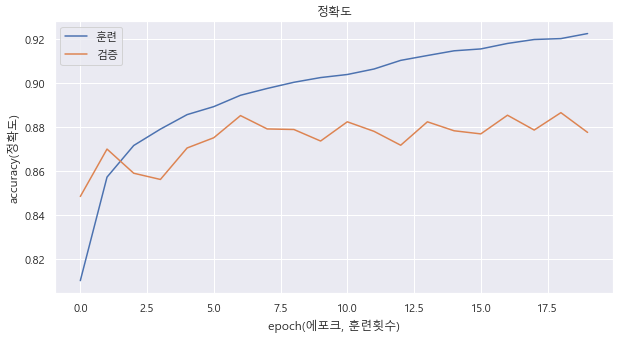

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('정확도')
plt.xlabel('epoch(에포크, 훈련횟수)')
plt.ylabel('accuracy(정확도)')
plt.legend(['훈련','검증'])
plt.show()

그래프로 확인해보면 어느정도 훈련횟수부터 과대적합이 일어남을 알 수 있다. >> 검증세트에 대한 손실 증가, 정확도 저하

드롭아웃
은닉층의 뉴런을 랜덤하게 꺼서(뉴런의 출력을 0으로 만들어) 이전층의 일부뉴런이 랜덤하게 꺼지면 특정 뉴런에 과대하게 의존하는 것을 줄일 수 있음


#### 드롭아웃

In [ ]:
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "model_fn_makemodel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# optimizer='adam'
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target))

Epoch 1/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5879 - accuracy: 0.7947 - val_loss: 0.4588 - val_accuracy: 0.8347
Epoch 2/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4437 - accuracy: 0.8423 - val_loss: 0.3797 - val_accuracy: 0.8637
Epoch 3/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4135 - accuracy: 0.8534 - val_loss: 0.3868 - val_accuracy: 0.8627
Epoch 4/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3978 - accuracy: 0.8613 - val_loss: 0.3913 - val_accuracy: 0.8628
Epoch 5/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3983 - accuracy: 0.8647 - val_loss: 0.3882 - val_accuracy: 0.8678
Epoch 6/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3937 - accuracy: 0.8670 - val_loss: 0.3948 - val_accuracy: 0.8703
Epoch 7/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3885 - accuracy: 0.8697 - val_loss: 0.3857 - val_accuracy:

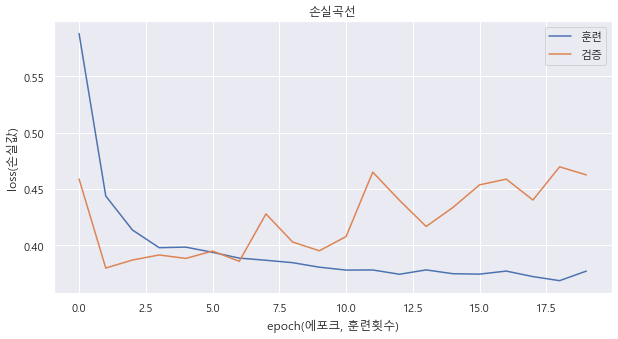

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.xlabel('epoch(에포크, 훈련횟수)')
plt.ylabel('loss(손실값)')
plt.legend(['훈련','검증'])
plt.title('손실곡선')
plt.show()

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target))

Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5923 - accuracy: 0.7921 - val_loss: 0.4425 - val_accuracy: 0.8389
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4403 - accuracy: 0.8430 - val_loss: 0.4196 - val_accuracy: 0.8457
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4054 - accuracy: 0.8545 - val_loss: 0.3863 - val_accuracy: 0.8563
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3849 - accuracy: 0.8590 - val_loss: 0.3688 - val_accuracy: 0.8659
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3702 - accuracy: 0.8636 - val_loss: 0.3514 - val_accuracy: 0.8706
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3548 - accuracy: 0.8698 - val_loss: 0.3434 - val_accuracy: 0.8789
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3437 - accuracy: 0.8731 - val_loss: 0.3421 - val_accuracy:

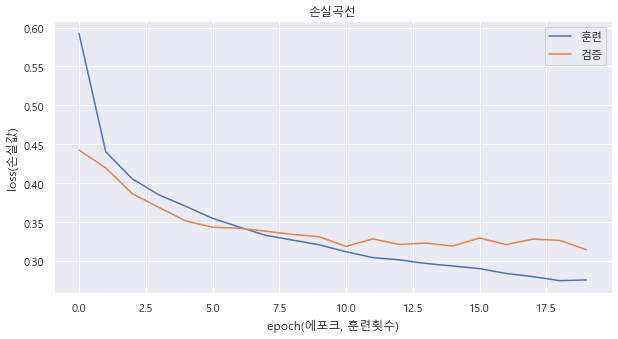

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.xlabel('epoch(에포크, 훈련횟수)')
plt.ylabel('loss(손실값)')
plt.legend(['훈련','검증'])
plt.title('손실곡선')
plt.show()

#### 모델 저장과 복원

In [11]:
# 에포크 횟수를 10으로 다시 지정하고 모델 훈련
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=10, verbose=0,
                    validation_data=(val_scaled, val_target))

In [12]:
# 훈련된 가중치만 저장
model.save_weights('./data/model_weights.h5')

In [13]:
# 훈련된 가중치만 저장
model.save('./data/model_whole.h5')

##### 가중치 모델 로드

In [15]:
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('./data/model_weights.h5')
# 가중치만 불러옴 -> 이 데이터로는 evaluate 불가능

##### 전체 모델 로드

In [16]:
model = keras.models.load_model('./data/model_whole.h5')
model.evaluate(val_scaled,val_target)
# 가중치만 저장하면 모델 기능 제약있음. 모델 전체 데이터 저장하면 모든 기능 수행

375/375 [==============================] - 1s 1ms/step - loss: 0.3239 - accuracy: 0.8815


[0.32389432191848755, 0.8815000057220459]

In [17]:
model.predict(val_scaled)

375/375 [==============================] - 1s 1ms/step


array([[8.3943469e-10, 3.9601573e-15, 1.9000067e-11, ..., 3.3420244e-07,
        9.9999821e-01, 1.4682842e-11],
       [1.4061509e-06, 1.5038771e-11, 6.4112406e-08, ..., 1.5566080e-10,
        9.9999785e-01, 1.1207985e-09],
       [2.5920337e-11, 2.6919145e-10, 1.6566957e-13, ..., 9.9818438e-01,
        3.7272678e-09, 3.2223274e-05],
       ...,
       [3.8431659e-05, 4.5322329e-10, 5.3457640e-08, ..., 8.2350468e-08,
        9.9995506e-01, 4.5454289e-07],
       [6.4833361e-09, 1.9554290e-13, 2.9886538e-09, ..., 4.4682658e-10,
        1.0000000e+00, 3.0499271e-12],
       [3.7306365e-01, 3.1840147e-05, 1.3836859e-02, ..., 4.6536101e-05,
        4.0641684e-05, 1.0136449e-03]], dtype=float32)

In [18]:
### 예측 결과
val_labels = np.argmax(model.predict(val_scaled), axis=-1)
np.mean(val_labels == val_target)

375/375 [==============================] - 1s 2ms/step


0.8815

In [19]:
val_labels

array([8, 8, 7, ..., 8, 8, 6], dtype=int64)

#### 콜백 callback

In [24]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

# 베스트 모델을 저장할 콜백
checkpoint_cb = keras.callbacks.ModelCheckpoint('./data/best_model.h5', save_best_only=True)

model.fit(train_scaled, train_target, epochs=20, verbose=0,
          validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb])

In [25]:
#  체크포인트 확인
model = keras.models.load_model('./data/best_model.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3132 - accuracy: 0.8875


[0.31317391991615295, 0.887499988079071]

#### 조기종료
- 과대적합이 시작되기 전에 훈련을 미리 중지하는 것 callback

In [55]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

# 베스트 모델을 저장할 콜백
# save_best_only=True 파라미터가 있어야 가장 좋은 모델 저장됨
#체크포인트로 저장
checkpoint_cb = keras.callbacks.ModelCheckpoint('./data/best_model2.h5',
                                                save_best_only=True, verbose=1)

# 베스트 weights를 저장할 조기종료 콜백
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, 
                                                  restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20, verbose=2,
          validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20

Epoch 1: val_loss improved from inf to 0.43291, saving model to ./data\best_model.h5
1500/1500 - 4s - loss: 0.5940 - accuracy: 0.7911 - val_loss: 0.4329 - val_accuracy: 0.8438 - 4s/epoch - 2ms/step
Epoch 2/20

Epoch 2: val_loss improved from 0.43291 to 0.40359, saving model to ./data\best_model.h5
1500/1500 - 3s - loss: 0.4407 - accuracy: 0.8406 - val_loss: 0.4036 - val_accuracy: 0.8511 - 3s/epoch - 2ms/step
Epoch 3/20

Epoch 3: val_loss improved from 0.40359 to 0.37659, saving model to ./data\best_model.h5
1500/1500 - 4s - loss: 0.4065 - accuracy: 0.8518 - val_loss: 0.3766 - val_accuracy: 0.8599 - 4s/epoch - 2ms/step
Epoch 4/20

Epoch 4: val_loss improved from 0.37659 to 0.35922, saving model to ./data\best_model.h5
1500/1500 - 3s - loss: 0.3834 - accuracy: 0.8601 - val_loss: 0.3592 - val_accuracy: 0.8657 - 3s/epoch - 2ms/step
Epoch 5/20

Epoch 5: val_loss improved from 0.35922 to 0.34717, saving model to ./data\best_model.h5
1500/1500 - 3s - loss: 0.3696 - accuracy: 0.864

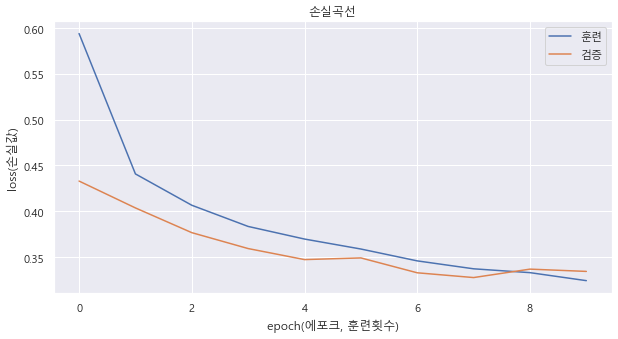

In [56]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.xlabel('epoch(에포크, 훈련횟수)')
plt.ylabel('loss(손실값)')
plt.legend(['훈련','검증'])
plt.title('손실곡선')
plt.show()

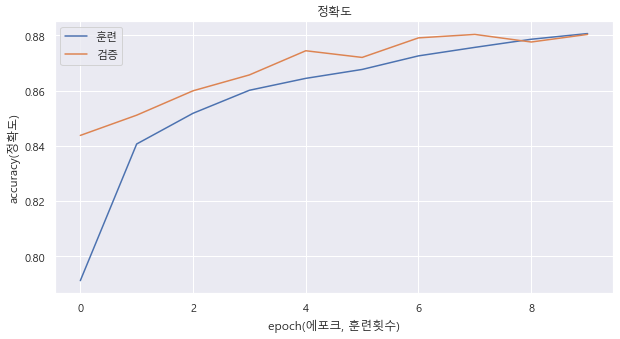

In [57]:
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('정확도')
plt.xlabel('epoch(에포크, 훈련횟수)')
plt.ylabel('accuracy(정확도)')
plt.legend(['훈련','검증'])
plt.show()

In [61]:
# 어느 에포크에서 조기종료했는지 확인
s = early_stopping_cb.stopped_epoch     # s+1번째에서 종료
s

9

In [59]:
# 조기종료된 모델
model.evaluate(val_scaled, val_target)      #  epoch ( s+1-2 )>>> patience를 2로 주었기 때문 ( accuracy를 기준으로 확인해보자 )

375/375 [==============================] - 1s 1ms/step - loss: 0.3276 - accuracy: 0.8803


[0.327555775642395, 0.8803333044052124]

조기종료된 모델 저장값/ 체크포인트로 저장된 모델 저장값 비교

In [63]:
model_cp = keras.models.load_model('./data/best_model2.h5')
model_cp.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3276 - accuracy: 0.8803


[0.327555775642395, 0.8803333044052124]